## Wall Cutoff Exploration
**Ashley Ferreira, November 2023**

In this notebook, we load in a combined file of electron and muon events that have no cutoff based on distance to the wall. 

We are interested in figuring out how close events can be to the wall to give us a signal that is realistic enough to infer something about the event. 

In this notebook, we are looking at the number of PMTs that light up as a way to figure out when we transition from the just dark noise regime to a regime where we get actual signal from the events. The distance to the wall is also not explicitly available from the detector data (we currently use FiTQun to get it) but the number of PMTs that light up is easily available, so we can use these results to make the cutoff based on number of PMTs.

In [1]:
from plot_wall import plot_wall
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# what file to read in events from
input_path = '/fast_scratch/WatChMaL/data/T2K/sep22_emu_2BugFixes_0dwallCut_1M_1/combine_combine.hy'

# what directory to output plots to (only if save_plots = True)
output_dir = '/fast_scratch_2/aferreira/t2k/ml/analysis_plots/'

ImportError: attempted relative import with no known parent package

In [ ]:
wall, towall, num_pmt, label = plot_wall(input_path, output_dir, text_file=False, save_plots=False)

Getting data from: /fast_scratch/WatChMaL/data/T2K/sep22_emu_2BugFixes_0dwallCut_1M_1/combine_combine.hy
[1 1 1 ... 0 0 0]


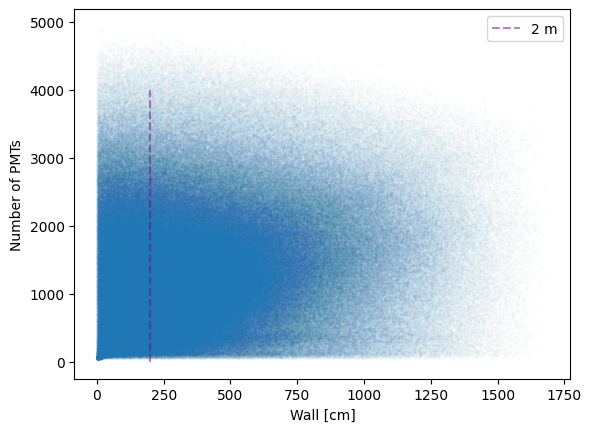

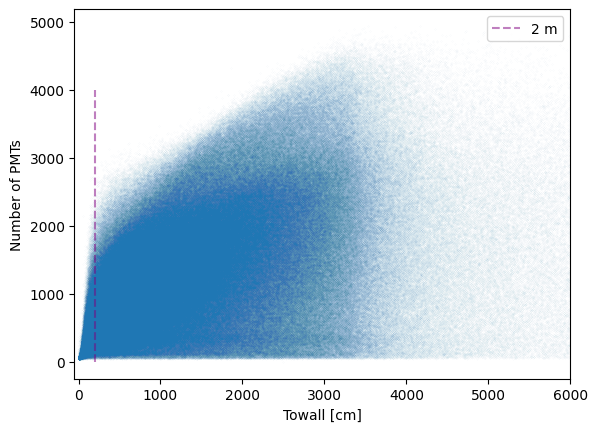

In [4]:
# create two figrues
fig1 = plt.figure()
ax1 = fig1.gca()

fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons
ax1.scatter(wall, num_pmt, alpha=0.1, s=0.01, label=label)
ax2.scatter(towall, num_pmt, alpha=0.1, s=0.01, label=label)

# make the 2m cutoff line go up to 4000
y_max = 4000

# add labels and stuff to make plots more understandable
ax1.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax1.set_xlabel('Wall [cm]')
ax1.set_ylabel('Number of PMTs')
ax1.legend(loc='upper right')

ax2.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
ax2.legend(loc='upper right')
#ax2.set_xlim(-50,6000) 

fig1.show()
fig2.show()

Now lets zoom in...

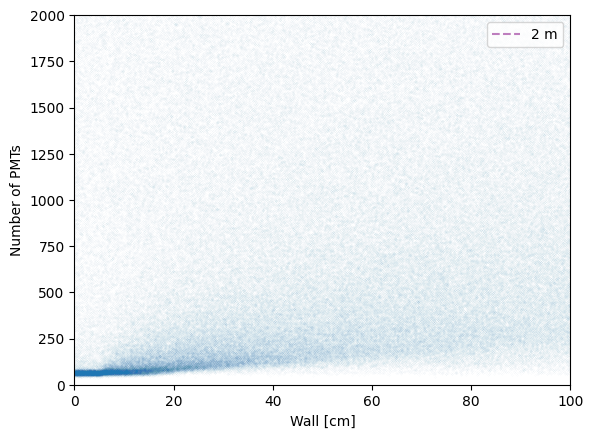

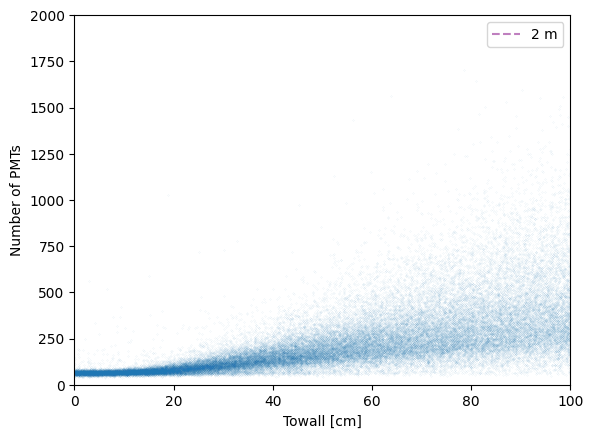

In [6]:
# create two figrues
fig1 = plt.figure()
ax1 = fig1.gca()

fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons

# maybe sifen them off by label
ax1.scatter(wall, num_pmt, alpha=0.1, s=0.01)
ax2.scatter(towall, num_pmt, alpha=0.3, s=0.01)

# add labels and stuff to make plots more understandable
ax1.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax1.set_xlabel('Wall [cm]')
ax1.set_ylabel('Number of PMTs')
ax1.legend(loc='upper right')

ax2.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
ax2.legend(loc='upper right')

ax1.set_xlim(0,100)
ax2.set_xlim(0,100) 

ax1.set_ylim(0,2000)
ax2.set_ylim(0,2000) 

fig1.show()
fig2.show()


Vertical line at XXXXXXX

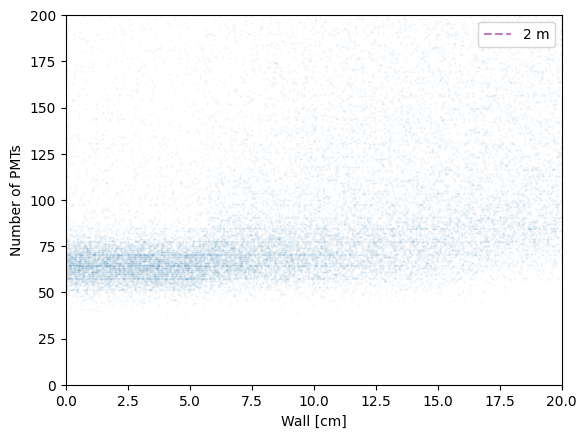

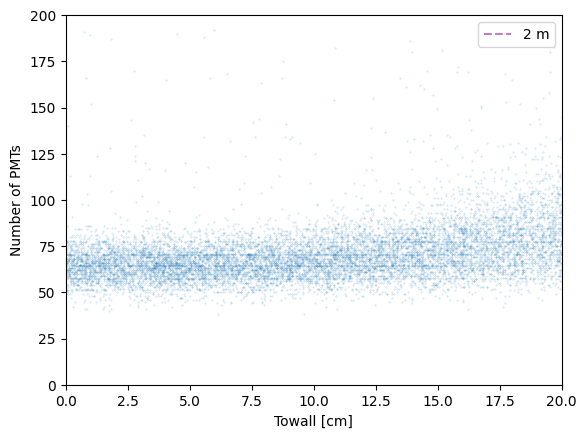

In [11]:
# create two figrues
fig1 = plt.figure()
ax1 = fig1.gca()

fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons

# maybe sifen them off by label
ax1.scatter(wall, num_pmt, alpha=0.1, s=0.1)
ax2.scatter(towall, num_pmt, alpha=0.3, s=0.1)

# add labels and stuff to make plots more understandable
#ax1.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax1.set_xlabel('Wall [cm]')
ax1.set_ylabel('Number of PMTs')
#ax1.legend(loc='upper right')

#ax2.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
#ax2.legend(loc='upper right')

ax1.set_xlim(0,20)
ax2.set_xlim(0,20) 

ax1.set_ylim(0,200)
ax2.set_ylim(0,200) # make these plots nice now, heatmap them, why do rhey look diff??

fig1.show()
fig2.show()

In [ ]:
# heat plot version

average pmts per bin, box plot, pmts above a specific charge, event displays at small towall and large numpmts and small num pmts

In [ ]:
### heatmap ###

# ~100 cut w/ seperate files

In [2]:
wall, towall, num_pmt, label = plot_walls(input_path='plotting_paths.txt', output_dir='/fast_scratch_2/aferreira/t2k/ml/analysis_plots/')

Getting files from: plotting_paths.txt
New path: /fast_scratch/WatChMaL/data/T2K/sep20_electrons_2BugFixes_1M_1/
[1 1 1 ... 1 1 1]


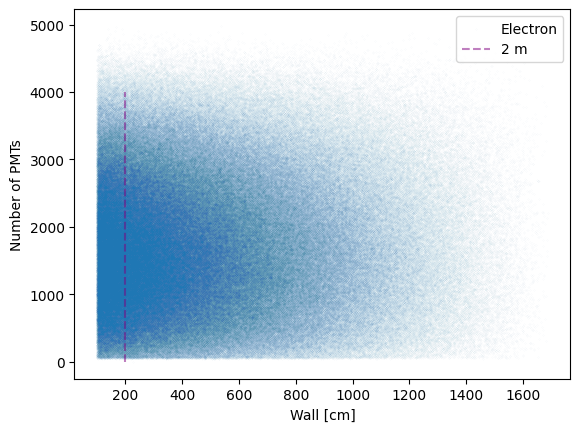

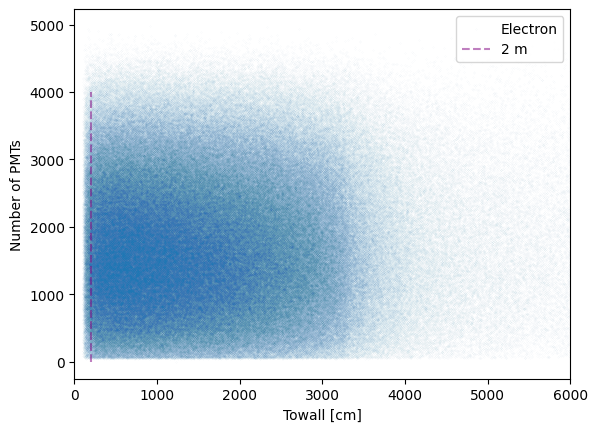

In [13]:
# create two figrues
fig1 = plt.figure()
ax1 = fig1.gca()

fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons
for wall_i, towall_i, num_pmt_i, label_i in zip(wall, towall, num_pmt, label):
    ax1.scatter(wall_i, num_pmt_i, alpha=0.1, label=label_i, s=0.01)
    ax2.scatter(towall_i, num_pmt_i, alpha=0.1, label=label_i, s=0.01)

# harcoded value just used for now
y_max = 4000

# add labels and stuff to make plots more understandable
ax1.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax1.set_xlabel('Wall [cm]')
ax1.set_ylabel('Number of PMTs')
ax1.legend(loc='upper right')
#ax1.set_xlim(0,1000)

ax2.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
ax2.legend(loc='upper right')
ax2.set_xlim(0,6000) # an outlier in this lower one?

fig1.show()
fig2.show()
plt.show()
    
# save plots
#fig2.savefig(output_dir+'towall_v_pmts.png')
#fig1.savefig(output_dir+'wall_v_pmts.png')

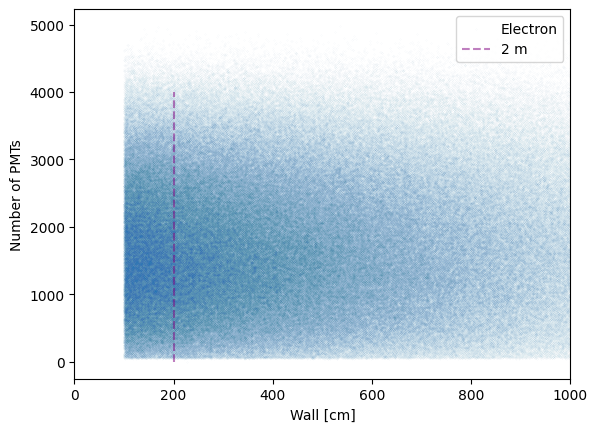

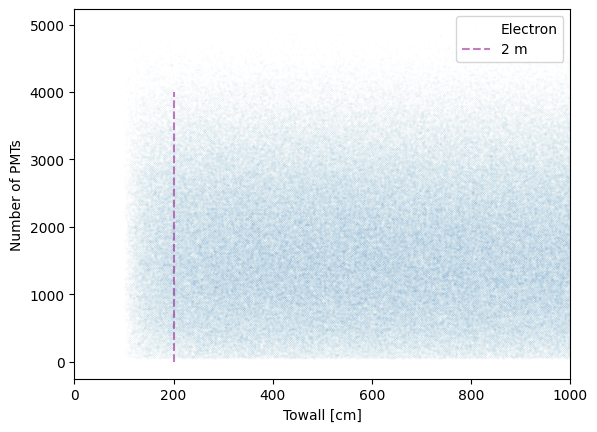

In [14]:
# create two figrues
fig1 = plt.figure()
ax1 = fig1.gca()

fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons
for wall_i, towall_i, num_pmt_i, label_i in zip(wall, towall, num_pmt, label):
    ax1.scatter(wall_i, num_pmt_i, alpha=0.1, label=label_i, s=0.01)
    ax2.scatter(towall_i, num_pmt_i, alpha=0.1, label=label_i, s=0.01)

y_max = 4000

# add labels and stuff to make plots more understandable
ax1.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax1.set_xlabel('Wall [cm]')
ax1.set_ylabel('Number of PMTs')
ax1.legend(loc='upper right')
ax1.set_xlim(0,1000)

ax2.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
ax2.legend(loc='upper right')
ax2.set_xlim(0,1000) 

fig1.show()
fig2.show()

wall and towall start at ~100 cm. is the gradient already cutoff?

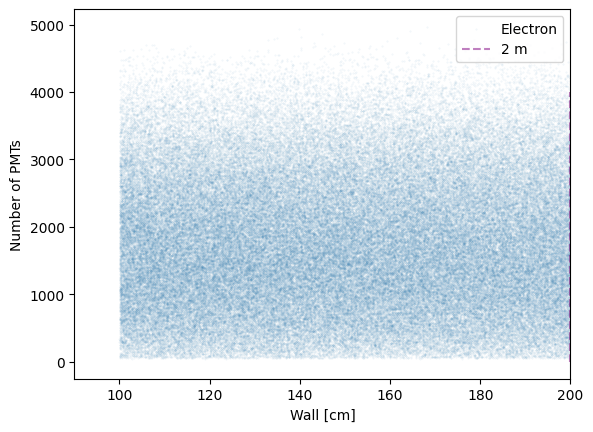

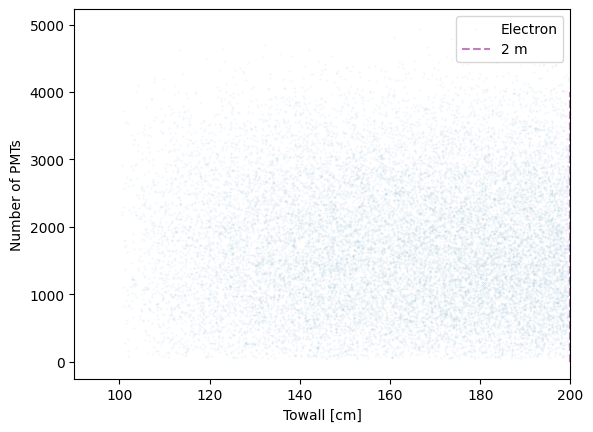

In [19]:
# create two figrues
fig1 = plt.figure()
ax1 = fig1.gca()

fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons
for wall_i, towall_i, num_pmt_i, label_i in zip(wall, towall, num_pmt, label):
    ax1.scatter(wall_i, num_pmt_i, alpha=0.1, label=label_i, s=0.1)
    ax2.scatter(towall_i, num_pmt_i, alpha=0.1, label=label_i, s=0.1)

# add labels and stuff to make plots more understandable
ax1.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax1.set_xlabel('Wall [cm]')
ax1.set_ylabel('Number of PMTs')
ax1.legend(loc='upper right')
ax1.set_xlim(90,200)

ax2.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
ax2.legend(loc='upper right')
ax2.set_xlim(90,200) 

fig1.show()
fig2.show()

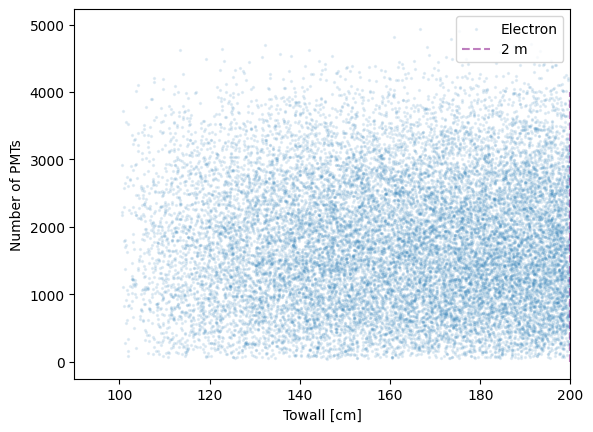

In [21]:
# create two figrues
fig2 = plt.figure()
ax2 = fig2.gca()

# make scatter plot of wall and towall vs num_pmts for electrons and muons
for wall_i, towall_i, num_pmt_i, label_i in zip(wall, towall, num_pmt, label):
    ax2.scatter(towall_i, num_pmt_i, alpha=0.1, label=label_i, s=2)

ax2.vlines(200, ymin=0, ymax=y_max, linestyles='--', label='2 m', color='purple', alpha=0.5)
ax2.set_xlabel('Towall [cm]')
ax2.set_ylabel('Number of PMTs')
ax2.legend(loc='upper right')
ax2.set_xlim(90,200) 

fig2.show()

normalize somehow by how many events in each interval?

In [ ]:
###### histograms ######


yeah maybe most of the fade is <100cm

In [ ]:
##### heatmaps #####

how to get many pmts lit up at such short distances?

not showing here